In [121]:
import pandas as pd
import numpy as np


data = [
    [160, 30000],
    [165, 32000],
    [170,     None],
    [None,    42000],
    [180,     50000],
    [175,     48000],
    [168,     None],
    [172,     46000],
    [None,    44000],
    [169,     41000],
]

df = pd.DataFrame(data, columns=["Height", "Salary"])
ord_df = df.copy()

In [122]:
print(df.isnull().sum().sum())

4


In [123]:
from sklearn.impute import SimpleImputer
model = SimpleImputer()
model.fit(df)
df = model.transform(df)

In [124]:
df = pd.DataFrame(df, columns=["Height", "Salary"])
df

,Height,Salary
0,160.000,30000.0
1,165.000,32000.0
2,170.000,41625.0
3,169.875,42000.0
4,180.000,50000.0
5,175.000,48000.0
6,168.000,41625.0
7,172.000,46000.0
8,169.875,44000.0
9,169.000,41000.0


In [125]:
from sklearn.preprocessing import StandardScaler # z = (x - 平均)/標準差 
model = StandardScaler()
model.fit(df)
print(model.fit_transform(df))

[[-1.94085034 -1.92715592]
 [-0.95814131 -1.59560221]
 [ 0.02456773  0.        ]
 [ 0.          0.06216632]
 [ 1.98998579  1.38838114]
 [ 1.00727676  1.05682744]
 [-0.36851589  0.        ]
 [ 0.41765134  0.72527373]
 [ 0.          0.39372003]
 [-0.17197408 -0.10361053]]


In [126]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
x = df[["Height"]].to_numpy()
y = df[["Salary"]].to_numpy()
model.fit(x,y)
w = model.coef_
b = model.intercept_
print(model.predict([[161]]))
print(model.intercept_)
print(f"{model.score(x,y)*100:.1f}%")

[[31716.15463544]]
[-148038.67394978]
88.7%


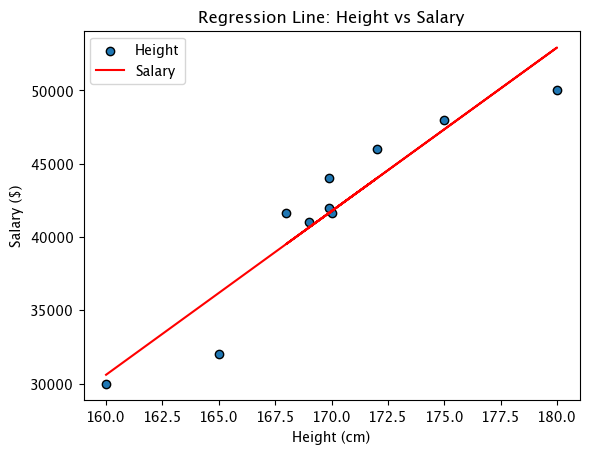

In [130]:
import matplotlib.pyplot as plt
df = pd.DataFrame(df)
y_pred = w*x+b
plt.scatter(df["Height"],df["Salary"],edgecolors="black",label="Height")
plt.plot(x,y_pred,color="red",label="Salary")
plt.title("Regression Line: Height vs Salary")
plt.xlabel("Height (cm)")
plt.ylabel("Salary ($)")
plt.legend()
plt.show()